## Getting tensorboard data

In [1]:
import tensorflow as tf
import tensorboard as tb
import tensorboard.backend.event_processing as ep
import tensorboard.backend.event_processing.event_file_loader as efl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [4]:
# loader = efl.EventFileLoader('../../data/2021-03/20210306-223124/Mar06_22-31-24_m20.hpcc.dartmouth.edu/events.out.tfevents.1615087884.m20.hpcc.dartmouth.edu.26520.0')

In [2]:
loader = efl.EventFileLoader('../../data/2021-03/20210315-150327/12/events.out.tfevents.1615835007.j05.hpcc.dartmouth.edu.11052.0')

In [3]:
events = []
for event in loader.Load():
    events.append(event)

In [4]:
hist_events = [a for a in events if 'hist' in str(a)]

In [5]:
steps, buckets, bucket_limits = zip(*[
    (a.step, a.summary.value[0].histo.bucket, a.summary.value[0].histo.bucket_limit)
    for a in hist_events
])

In [33]:
len(bucket_limits)

731

In [6]:
# default figure size is [6.0, 4.0]
plt.rcParams['figure.figsize'] = [5, 3.33]
# default dpi is 72
plt.rcParams['figure.dpi'] = 144

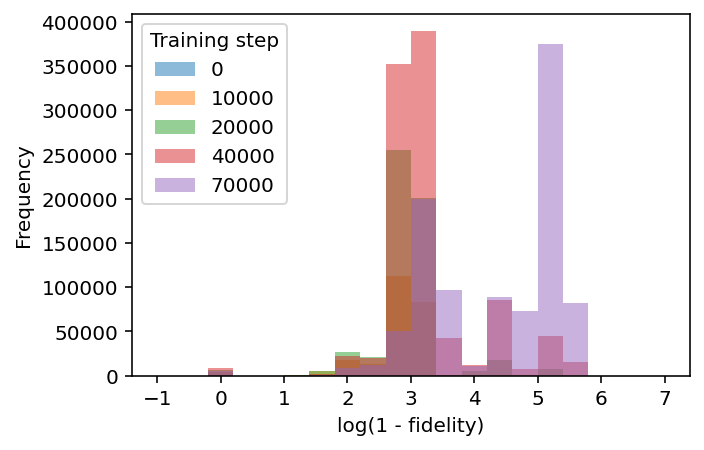

In [7]:
for i in [0, 100, 200, 400, 700]:
    plt.hist(bucket_limits[i], bins=20, weights=buckets[i], range=(-1, 7),
             density=False, alpha=0.5, label=str(steps[i]))
plt.legend(title='Training step')
plt.xlabel('log(1 - fidelity)')
plt.ylabel('Frequency')
plt.show()

In [8]:
731/5

146.2

on 0...
on 10...
on 20...
on 30...
on 40...
on 50...
on 60...
on 70...
on 80...
on 90...
on 100...
on 110...
on 120...
on 130...
on 140...
on 150...
on 160...
on 170...
on 180...
on 190...
on 200...
on 210...
on 220...
on 230...
on 240...
on 250...
on 260...
on 270...
on 280...
on 290...
on 300...
on 310...
on 320...
on 330...
on 340...
on 350...
on 360...
on 370...
on 380...
on 390...
on 400...
on 410...
on 420...
on 430...
on 440...
on 450...
on 460...
on 470...
on 480...
on 490...
on 500...
on 510...
on 520...
on 530...
on 540...
on 550...
on 560...
on 570...
on 580...
on 590...
on 600...
on 610...
on 620...
on 630...
on 640...
on 650...
on 660...
on 670...
on 680...
on 690...
on 700...
on 710...
on 720...


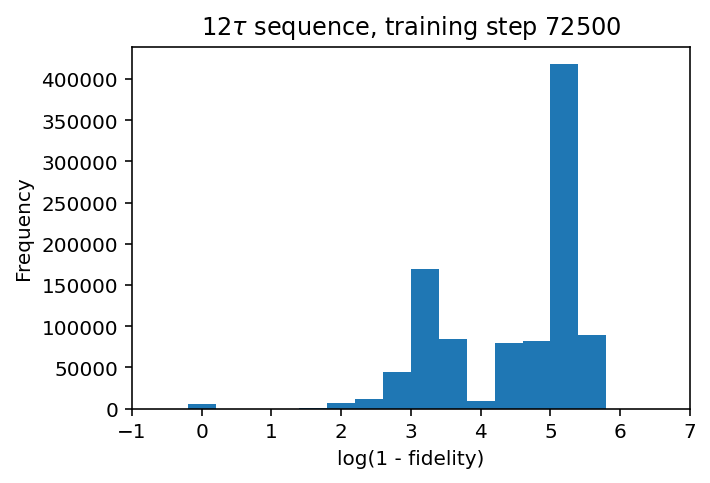

In [10]:
for j in range(int(731/5)):
    i = j * 5
    if i % 10 == 0:
        print(f'on {i}...')
    plt.clf()
    plt.xlim(-1, 7)
    # plt.ylim(0, 1.25)
    plt.hist(bucket_limits[i], bins=20, weights=buckets[i], range=(-1, 7),
             density=False,
             # alpha=0.5, label=str(steps[i])
            )
    # plt.legend(title='Training step')
    plt.xlabel('log(1 - fidelity)')
    plt.ylabel('Frequency')
    plt.title(fr'12$\tau$ sequence, training step {steps[i]}')
    plt.savefig(f'hist-{j:04.0f}.png', bbox_inches='tight')

Then once this is done, 

- `mogrify -format png -gravity south -chop 0x1 hist*.png` to make height even pixel count
- `ffmpeg -framerate 16 -i hist-%05d.png -r 30 -pix_fmt yuv420p _output.mp4` to compile into video